In [1]:
include("../src/JuliaMBDv1.jl")

Main.JuliaMBDv1

In [2]:
using DifferentialEquations
using Plots
using .JuliaMBDv1


In [3]:
@model Eng_mnt_f_pnt begin
    @parameter d_Fr_ENG_mount = 1825.3
    @parameter k_Fr_ENG_mount = 1.3598e+5
    @parameter z_k_Fr_ENG_mount_ini = 0.00036769
    
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk Add1 = AddBlock([:-, :+]) inport[1]:in1 inport[2]:in2
    @blk Integrator1 = IntegratorBlock(initialcondition = z_k_Fr_ENG_mount_ini) outport:gain1
    @blk Gain = GainBlock(d_Fr_ENG_mount)
    @blk Gain1 = GainBlock(k_Fr_ENG_mount)
    @blk Add2 = AddBlock([:+, :+]) inport[1]:in3 inport[2]:in4
    @blk Gain2 = GainBlock(-1)
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()
    
    @connect In1 => in1
    @connect In2 => in2
    @connect Add1 => Gain
    @connect Add1 => Integrator1
    @connect Integrator1 => Gain1
    @connect Gain => in3
    @connect Gain1 => in4
    @connect Add2 => Out1
    @connect Add2 => Gain2
    @connect Gain2 => Out2
end

Eng_mnt_f_pnt (generic function with 1 method)

In [4]:
@model Eng_mnt_r_pnt begin
    
    @parameter d_Rr_ENG_mount = 5215
    @parameter k_Rr_ENG_mount = 6.7992e+5
    @parameter z_k_Rr_ENG_mount_ini = 0
    
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk Add1 = AddBlock([:-, :+]) inport[1]:in1 inport[2]:in2 ###
    @blk Integrator1 = IntegratorBlock(initialcondition = z_k_Rr_ENG_mount_ini) outport:gain1
    
    @blk Gain = GainBlock(d_Rr_ENG_mount)
    @blk Gain1 = GainBlock(k_Rr_ENG_mount)
    @blk Add2 = AddBlock([:+, :+]) inport[1]:in3 inport[2]:in4
    @blk Gain2 = GainBlock(-1)
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()
    
    @connect In1 => in1
    @connect In2 => in2
    
    @connect Add1 => Gain
    @connect Add1 => Integrator1
    @connect Integrator1 => Gain1
    @connect Gain => in3
    @connect Gain1 => in4
    @connect Add2 => Out1
    @connect Add2 => Gain2
    @connect Gain2 => Out2
end

Eng_mnt_r_pnt (generic function with 1 method)

In [5]:
@model pitch_rate begin
    @parameter I_ENG2Fr_mount = 0
    @parameter I_ENG2Rr_mount = -0.4
    @parameter i_center_ENG = 100
    
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk Constant4 = ConstantBlock(I_ENG2Fr_mount)
    @blk Constant1 = ConstantBlock(I_ENG2Rr_mount)
    @blk Add1 = AddBlock([:+, :+]) inport[1]:cons1 inport[2]:cons2
    @blk Constant6 = ConstantBlock(i_center_ENG)
    @blk Integrator = IntegratorBlock(initialcondition = 6)
    @blk Out1 = OutBlock()
    
    @connect In1*Constant4 => cons1
    @connect In2*Constant1 => cons2
    @connect Add1/Constant6=>Integrator
    @connect Integrator=>Out1
end

@model v_z_carbody begin
    @parameter g = 9.8
    @parameter M_ENG = 50
    
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk Constant1 = ConstantBlock(g)
    @blk Constant = ConstantBlock(M_ENG)
    @blk Add = AddBlock([:+, :+, :-]) inport[1]:in1 inport[2]:in2 inport[3]:abc
    @blk Integrator1 = IntegratorBlock()
    @blk Out1 = OutBlock()
    
    @connect In1 => in1
    @connect In2 => in2
    @connect Constant1*Constant => abc
    @connect Add / Constant => Integrator1
    @connect Integrator1 => Out1
end

@model z_velocity begin
    @parameter I_ENG2Fr_ENG_mount = 0
    @parameter I_ENG2Rr_ENG_mount = -0.4
    
    @blk In1 = InBlock() 
    @blk In2 = InBlock()
    @blk Constant10 = ConstantBlock(I_ENG2Fr_ENG_mount)
    @blk Constant1 = ConstantBlock(I_ENG2Rr_ENG_mount)
    @blk Add2 = AddBlock([:+, :+]) inport[1]:in1 inport[2]:pro8
    @blk Add1 = AddBlock([:+, :+]) inport[1]:in2 inport[2]:pro1
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()
    
    
    @connect In1 => in1
    @connect In2 => in2
    @connect In2*Constant10 => pro8
    @connect In2*Constant1 => pro1
    @connect Add2 => Out1
    @connect Add1 => Out2
end

@model Eng_pnt begin

    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk b1 = v_z_carbody() inport[1]:in1 inport[2]:in2 outport[1]:out1
    @blk b2 = pitch_rate() inport[1]:in3 inport[2]:in4 outport[1]:out2
    @blk b3 = z_velocity() inport[1]:in5 inport[2]:in6 outport[1]:out3 outport[2]:out4
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()

    @connect In1 => in1
    @connect In2 => in2
    @connect In1 => in3
    @connect In2 => in4
    @connect out1 => in5
    @connect out2 => in6
    @connect out3 => Out1
    @connect out4 => Out2
end

Eng_pnt (generic function with 1 method)

In [6]:
@model Hm_bd_f_pnt begin
    @parameter g = 9.8
    @parameter M_Fr_body = 44.01
    
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk In3 = InBlock()
    @blk Constant1 = ConstantBlock(g)
    @blk Constant = ConstantBlock(M_Fr_body)
    @blk Add2 = AddBlock([:+, :+, :+, :-]) inport[1]:in1 inport[2]:in2 inport[3]:in3 inport[4]:abc
    @blk Integrator = IntegratorBlock()
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()
    @blk Out3 = OutBlock()
    
    @connect In1 => in1
    @connect In2 => in2
    @connect In3 => in3
    @connect Constant1*Constant => abc
    @connect Add2 / Constant => Integrator
    @connect Integrator => Out1
    @connect Integrator => Out2
    @connect Integrator => Out3
end

@model Hm_hd_f_pnt begin
    @parameter M_Fr_head = 27.6
    @parameter r_Fr_head = 0.21857
    @parameter theta_Fr_head = 1.3251
    @parameter k_Fr_head = 1210
    @parameter d_Fr_head = 8.17
    @parameter I_Fr_head = 1.8
    @parameter x_k_Fr_head_ini = -0.011885
    @parameter g = 9.8

    @blk In1 = InBlock()
    @blk d1 = GainBlock(1) # Derivative のかわり
    @blk add1 = AddBlock([:+, :+]) inport[1]:in1 inport[2]:in2
    @blk c1 = ConstantBlock(g)
    @blk c2 = ConstantBlock(M_Fr_head)
    @blk c3 = ConstantBlock(r_Fr_head)
    @blk c4 = ConstantBlock(theta_Fr_head)
    @blk c5 = ConstantBlock(M_Fr_head)
    @blk c6 = ConstantBlock(r_Fr_head)
    @blk add2 = AddBlock([:-, :-]) inport[1]:in3 inport[2]:in4
    @blk add3 = AddBlock([:+, :+]) inport[1]:in5 inport[2]:in6
    @blk cos1 = TrigonometricFunctionBlock(:cos)
    @blk sin1 = TrigonometricFunctionBlock(:sin)
    @blk add4 = AddBlock([:-, :-, :-]) inport[1]:in7 inport[2]:in8 inport[3]:in9
    @blk c7 = ConstantBlock(k_Fr_head)
    @blk c8 = ConstantBlock(d_Fr_head)
    @blk c9 = ConstantBlock(I_Fr_head)
    @blk int1 = IntegratorBlock()
    @blk int2 = IntegratorBlock(initialcondition=x_k_Fr_head_ini)
    @blk g2 = GainBlock(-1)
    @blk Out1 = OutBlock()

    @connect In1 => d1
    @connect d1 => in1
    @connect c1 => in2
    @connect add1 * c2 => in5
    @connect c4 => in3
    @connect int2 => in4
    @connect add2 => cos1
    @connect add1 * c2 * c3 * cos1 => in7
    @connect add2 => sin1
    @connect c5 * c6 * sin1 => in6
    @connect c7 * int2 => in8
    @connect c8 * int1 => in9
    @connect add4 / c9 => int1
    @connect int1 => int2
    @connect add3 => g2
    @connect g2 => Out1
end

@model Hm_vs_f_pnt begin
    @parameter z_kz_Fr_body_organs_ini = 0.001526
    @parameter kz_Fr_body_organs = 82200
    @parameter dz_Fr_body_organs = 195
    @parameter M_Fr_body_organs = 12.8
    @parameter g = 9.8
    
    @blk In = InBlock()
    @blk Add1 = AddBlock([:-, :+]) inport[1]:inte inport[2]:in1
    @blk Integrator1 = IntegratorBlock(initialcondition=z_kz_Fr_body_organs_ini)
    @blk Gain2 = GainBlock(kz_Fr_body_organs)
    @blk Gain3 = GainBlock(dz_Fr_body_organs)
    @blk Add4 = AddBlock([:+, :+]) inport[1]:gain2 inport[2]:gain3
    @blk Gain1 = GainBlock(-1)
    @blk Constant = ConstantBlock(M_Fr_body_organs)
    @blk Constant1 = ConstantBlock(g)
    @blk Add = AddBlock([:+, :-]) inport[1]:add4 inport[2]:pro
    @blk Integrator = IntegratorBlock()
    @blk Out1 = OutBlock()
    
    @connect In => in1
    @connect Integrator => inte
    @connect Add1 => Integrator1
    @connect Integrator1 => Gain2
    @connect Add1 => Gain3
    @connect Gain2 => gain2
    @connect Gain3 => gain3
    @connect Add4 => add4
    @connect Constant1 * Constant => pro
    @connect Add / Constant => Integrator
    @connect Add4 => Gain1
    @connect Gain1 => Out1
end

@model Hm_f_pnt begin
    @blk In1 = InBlock()
    @blk Out1 = OutBlock()
    @blk b1 = Hm_hd_f_pnt() inport[1]:in1 outport[1]:out1
    @blk b2 = Hm_vs_f_pnt() inport[1]:in2 outport[1]:out2
    @blk b3 = Hm_bd_f_pnt() inport[1]:in3 inport[2]:in4 inport[3]:in5 outport[1]:out3 outport[2]:out4 outport[3]:out5
    @connect In1 => in5
    @connect out1 => in3
    @connect out2 => in4
    @connect out3 => in1
    @connect out4 => in2
    @connect out5 => Out1
end

Hm_f_pnt (generic function with 1 method)

In [7]:
@model Hm_bd_r_pnt begin
    @parameter g = 9.8
    @parameter M_Rr_body = 44.01
    
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk In3 = InBlock()
    @blk Constant1 = ConstantBlock(g)
    @blk Constant = ConstantBlock(M_Rr_body)
    @blk Add2 = AddBlock([:+, :+, :+, :-]) inport[1]:in1 inport[2]:in2 inport[3]:in3 inport[4]:abc
    @blk Integrator = IntegratorBlock()
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()
    @blk Out3 = OutBlock()
    
    @connect In1 => in1
    @connect In2 => in2
    @connect In3 => in3
    @connect Constant1*Constant => abc
    @connect Add2 / Constant => Integrator
    @connect Integrator => Out1
    @connect Integrator => Out2
    @connect Integrator => Out3
end

@model Hm_hd_r_pnt begin
    @parameter M_Rr_head = 27.6
    @parameter r_Rr_head = 0.21857
    @parameter theta_Rr_head = 1.3251
    @parameter k_Rr_head = 1210
    @parameter d_Rr_head = 8.17
    @parameter I_Rr_head = 1.8
    @parameter x_k_Rr_head_ini = -0.011885
    @parameter g = 9.8

    @blk In1 = InBlock()
    @blk d1 = GainBlock(1) # Derivative のかわり
    @blk add1 = AddBlock([:+, :+]) inport[1]:in1 inport[2]:in2
    @blk c1 = ConstantBlock(g)
    @blk c2 = ConstantBlock(M_Rr_head)
    @blk c3 = ConstantBlock(r_Rr_head)
    @blk c4 = ConstantBlock(theta_Rr_head)
    @blk c5 = ConstantBlock(M_Rr_head)
    @blk c6 = ConstantBlock(r_Rr_head)
    @blk add2 = AddBlock([:-, :-]) inport[1]:in3 inport[2]:in4
    @blk add3 = AddBlock([:+, :+]) inport[1]:in5 inport[2]:in6
    @blk cos1 = TrigonometricFunctionBlock(:cos)
    @blk sin1 = TrigonometricFunctionBlock(:sin)
    @blk add4 = AddBlock([:-, :-, :-]) inport[1]:in7 inport[2]:in8 inport[3]:in9
    @blk c7 = ConstantBlock(k_Rr_head)
    @blk c8 = ConstantBlock(d_Rr_head)
    @blk c9 = ConstantBlock(I_Rr_head)
    @blk int1 = IntegratorBlock()
    @blk int2 = IntegratorBlock(initialcondition=x_k_Rr_head_ini)
    @blk g2 = GainBlock(-1)
    @blk Out1 = OutBlock()

    @connect In1 => d1
    @connect d1 => in1
    @connect c1 => in2
    @connect add1 * c2 => in5
    @connect c4 => in3
    @connect int2 => in4
    @connect add2 => cos1
    @connect add1 * c2 * c3 * cos1 => in7
    @connect add2 => sin1
    @connect c5 * c6 * sin1 => in6
    @connect c7 * int2 => in8
    @connect c8 * int1 => in9
    @connect add4 / c9 => int1
    @connect int1 => int2
    @connect add3 => g2
    @connect g2 => Out1
end

@model Hm_vs_r_pnt begin
    @parameter z_kz_Rr_body_organs_ini = 0.001526
    @parameter kz_Rr_body_organs = 82200
    @parameter dz_Rr_body_organs = 195
    @parameter M_Rr_body_organs = 12.8
    @parameter g = 9.8
    
    @blk In = InBlock()
    @blk Add1 = AddBlock([:-, :+]) inport[1]:inte inport[2]:in1
    @blk Integrator1 = IntegratorBlock(initialcondition=z_kz_Rr_body_organs_ini)
    @blk Gain2 = GainBlock(kz_Rr_body_organs)
    @blk Gain3 = GainBlock(dz_Rr_body_organs)
    @blk Add4 = AddBlock([:+, :+]) inport[1]:gain2 inport[2]:gain3
    @blk Gain1 = GainBlock(-1)
    @blk Constant = ConstantBlock(M_Rr_body_organs)
    @blk Constant1 = ConstantBlock(g)
    @blk Add = AddBlock([:+, :-]) inport[1]:add4 inport[2]:pro
    @blk Integrator = IntegratorBlock()
    @blk Out1 = OutBlock()
    
    @connect In => in1
    @connect Integrator => inte
    @connect Add1 => Integrator1
    @connect Integrator1 => Gain2
    @connect Add1 => Gain3
    @connect Gain2 => gain2
    @connect Gain3 => gain3
    @connect Add4 => add4
    @connect Constant1 * Constant => pro
    @connect Add / Constant => Integrator
    @connect Add4 => Gain1
    @connect Gain1 => Out1
end

@model Hm_r_pnt begin
    @blk In1 = InBlock()
    @blk Out1 = OutBlock()
    @blk b1 = Hm_hd_r_pnt() inport[1]:in1 outport[1]:out1
    @blk b2 = Hm_vs_r_pnt() inport[1]:in2 outport[1]:out2
    @blk b3 = Hm_bd_r_pnt() inport[1]:in3 inport[2]:in4 inport[3]:in5 outport[1]:out3 outport[2]:out4 outport[3]:out5
    @connect In1 => in5
    @connect out1 => in3
    @connect out2 => in4
    @connect out3 => in1
    @connect out4 => in2
    @connect out5 => Out1
end

Hm_r_pnt (generic function with 1 method)

In [8]:
@model Mus_f_pnt begin
    @parameter g = 9.8
    @parameter M_Fr_wheel = 50
    
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk Constant1 = ConstantBlock(g)
    @blk Constant = ConstantBlock(M_Fr_wheel)
    @blk Add2 = AddBlock([:+, :+, :-]) inport[1]:in1 inport[2]:in2 inport[3]:pro
    @blk Integrator = IntegratorBlock()
    
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()
    
    @connect In1 => in1
    @connect In2 => in2
    @connect Constant1 * Constant => pro
    @connect Add2 / Constant => Integrator
    @connect Integrator => Out1
    @connect Integrator => Out2
end

Mus_f_pnt (generic function with 1 method)

In [9]:
@model Mus_r_pnt begin
    @parameter g = 9.8
    @parameter M_Rr_wheel = 50
    
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk Constant1 = ConstantBlock(g)
    @blk Constant = ConstantBlock(M_Rr_wheel)
    @blk Add2 = AddBlock([:+, :+, :-]) inport[1]:in1 inport[2]:in2 inport[3]:pro
    @blk Integrator = IntegratorBlock()
    
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()
    
    @connect In1 => in1
    @connect In2 => in2
    @connect Constant1 * Constant => pro
    @connect Add2 / Constant => Integrator
    @connect Integrator => Out1
    @connect Integrator => Out2
end

Mus_r_pnt (generic function with 1 method)

In [10]:
# table, derivative を gain(1)に
@model Rd_pnt begin
    @parameter i_wheelbase = 2.635
    @parameter vel_car_kmph = 60
    @parameter kmph2mps = 0.27778

    @blk c1 = ConstantBlock(i_wheelbase)
    @blk c2 = ConstantBlock(vel_car_kmph)
    @blk gain1 = GainBlock(kmph2mps)
    @blk inte1 = IntegratorBlock()
    @blk add1 = AddBlock([:-, :+]) inport[1]:in1 inport[2]:in2
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()

    @connect c1 => in1
    @connect c2 => gain1
    @connect gain1 => inte1
    @connect inte1 => in2
    @connect inte1 => Out2
    @connect add1 => Out1
end


Rd_pnt (generic function with 1 method)

In [11]:
@model St_f_pnt begin
    
    @parameter d_Fr_chair = 6634
    @parameter k_Fr_chair = 1000000
    @parameter z_k_Fr_chair_ini = 0.00082722
    
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk Add1 = AddBlock([:-, :+]) inport[1]:in1 inport[2]:in2 
    @blk Integrator1 = IntegratorBlock(initialcondition = z_k_Fr_chair_ini) outport:gain1
    
    @blk Gain = GainBlock(d_Fr_chair)
    @blk Gain1 = GainBlock(k_Fr_chair)
    @blk Add2 = AddBlock([:+, :+]) inport[1]:in3 inport[2]:in4
    @blk Gain2 = GainBlock(-1)
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()
    
    @connect In1 => in1
    @connect In2 => in2
    
    @connect Add1 => Gain
    @connect Add1 => Integrator1
    @connect Integrator1 => Gain1
    @connect Gain => in3
    @connect Gain1 => in4
    @connect Add2 => Out1
    @connect Add2 => Gain2
    @connect Gain2 => Out2
end

St_f_pnt (generic function with 1 method)

In [12]:
@model St_r_pnt begin
    
    @parameter d_Rr_chair = 9381.9
    @parameter k_Rr_chair = 2000000
    @parameter z_k_Rr_chair_ini = 0.00041361
    
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk Add1 = AddBlock([:-, :+]) inport[1]:in1 inport[2]:in2 
    @blk Integrator1 = IntegratorBlock(initialcondition = z_k_Rr_chair_ini) outport:gain1
    
    @blk Gain = GainBlock(d_Rr_chair)
    @blk Gain1 = GainBlock(k_Rr_chair)
    @blk Add2 = AddBlock([:+, :+]) inport[1]:in3 inport[2]:in4
    @blk Gain2 = GainBlock(-1)
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()
    
    @connect In1 => in1
    @connect In2 => in2
    
    @connect Add1 => Gain
    @connect Add1 => Integrator1
    @connect Integrator1 => Gain1
    @connect Gain => in3
    @connect Gain1 => in4
    @connect Add2 => Out1
    @connect Add2 => Gain2
    @connect Gain2 => Out2
end

St_r_pnt (generic function with 1 method)

In [13]:
@model front_damper begin
    @parameter d_Fr_sus_fric_gain = 10000
    @parameter d_Fr_sus_fric = 40

    @blk In1 = InBlock()
    @blk tab1 = GainBlock(1)
    @blk g1 = GainBlock(d_Fr_sus_fric_gain)
    @blk c1 = ConstantBlock(d_Fr_sus_fric)
    @blk g2 = GainBlock(-1)
    @blk add1 = AddBlock([:+, :+]) inport[1]:in1 inport[2]:in2
    @blk sa1 = SaturationDynamicBlock() inport[1]:in inport[2]:up inport[3]:lo
    @blk Out1 = OutBlock()

    @connect In1 => tab1
    @connect In1 * tab1 => in1
    @connect In1 => g1
    @connect g1 => in
    @connect c1 => up
    @connect c1 => g2
    @connect g2 => lo
    @connect sa1 => in2
    @connect add1 => Out1
end

@model Sus_f_pnt begin
    @parameter L_ratio_Fr_sus = 1.2048
    @parameter z_k_Fr_sus_ini = 0.10755
    @parameter k_Fr_sus = 30690

    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk c1 = ConstantBlock(L_ratio_Fr_sus)
    @blk add1 = AddBlock([:-, :+]) inport[1]:in1 inport[2]:in2
    @blk b1 = front_damper()
    @blk add2 = AddBlock([:+, :+]) inport[1]:in3 inport[2]:in4
    @blk inte1 = IntegratorBlock(initialcondition=z_k_Fr_sus_ini)
    @blk g1 = GainBlock(k_Fr_sus)
    @blk g2 = GainBlock(2)
    @blk g3 = GainBlock(-1)
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()

    @connect In1 => in1
    @connect In2 => in2
    @connect c1 * add1 => b1
    @connect c1 * add1 => inte1
    @connect inte1 => g1
    @connect b1 => in3
    @connect g1 => in4
    @connect c1 * add2 => g2
    @connect g2 => Out1
    @connect g2 => g3
    @connect g3 => Out2
end

Sus_f_pnt (generic function with 1 method)

In [14]:
@model rear_damper begin
    @parameter d_Rr_sus_fric_gain = 10000
    @parameter d_Rr_sus_fric = 30

    @blk In1 = InBlock()
    @blk tab1 = GainBlock(1)
    @blk g1 = GainBlock(d_Rr_sus_fric_gain)
    @blk c1 = ConstantBlock(d_Rr_sus_fric)
    @blk g2 = GainBlock(-1)
    @blk add1 = AddBlock([:+, :+]) inport[1]:in1 inport[2]:in2
    @blk sa1 = SaturationDynamicBlock() inport[1]:in inport[2]:up inport[3]:lo
    @blk Out1 = OutBlock()

    @connect In1 => tab1
    @connect In1 * tab1 => in1
    @connect In1 => g1
    @connect g1 => in
    @connect c1 => up
    @connect c1 => g2
    @connect g2 => lo
    @connect sa1 => in2
    @connect add1 => Out1
end

@model Sus_r_pnt begin
    @parameter L_ratio_Rr_sus = 1.2048
    @parameter z_k_Rr_sus_ini = 0.076651
    @parameter k_Rr_sus = 30690

    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk c1 = ConstantBlock(L_ratio_Rr_sus)
    @blk add1 = AddBlock([:-, :+]) inport[1]:in1 inport[2]:in2
    @blk b1 = rear_damper()
    @blk add2 = AddBlock([:+, :+]) inport[1]:in3 inport[2]:in4
    @blk inte1 = IntegratorBlock(initialcondition=z_k_Rr_sus_ini)
    @blk g1 = GainBlock(k_Rr_sus)
    @blk g2 = GainBlock(2)
    @blk g3 = GainBlock(-1)
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()

    @connect In1 => in1
    @connect In2 => in2
    @connect c1 * add1 => b1
    @connect c1 * add1 => inte1
    @connect inte1 => g1
    @connect b1 => in3
    @connect g1 => in4
    @connect c1 * add2 => g2
    @connect g2 => Out1
    @connect g2 => g3
    @connect g3 => Out2
end

Sus_r_pnt (generic function with 1 method)

In [15]:
@model Tr_f_pnt begin
    
    @parameter d_Fr_wheel = 3162.3
    @parameter k_Fr_wheel = 200000
    @parameter z_k_Fr_wheel_ini = 0.022334
    
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk Add1 = AddBlock([:-, :+]) inport[1]:in1 inport[2]:in2 
    @blk Integrator1 = IntegratorBlock(initialcondition = z_k_Fr_wheel_ini) outport:gain1
    
    @blk Gain = GainBlock(d_Fr_wheel)
    @blk Gain1 = GainBlock(k_Fr_wheel)
    @blk Add2 = AddBlock([:+, :+]) inport[1]:in3 inport[2]:in4
    @blk Gain2 = GainBlock(-1)
    @blk Gain3 = GainBlock(2)
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()
    
    
    
    @connect In1 => in1
    @connect In2 => in2
    
    @connect Add1 => Gain
    @connect Add1 => Integrator1
    @connect Integrator1 => Gain1
    @connect Gain => in3
    @connect Gain1 => in4
    @connect Add2 => Gain3
    @connect Gain3 => Out1
    @connect Gain3 => Gain2
    @connect Gain2 => Out2
end

Tr_f_pnt (generic function with 1 method)

In [16]:
@model Tr_r_pnt begin
    
    @parameter d_Rr_wheel = 3162.3
    @parameter k_Rr_wheel = 200000
    @parameter z_k_Rr_wheel_ini = 0.016621
    
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk Add1 = AddBlock([:-, :+]) inport[1]:in1 inport[2]:in2 
    @blk Integrator1 = IntegratorBlock(initialcondition = z_k_Rr_wheel_ini) outport:gain1
    
    @blk Gain = GainBlock(d_Rr_wheel)
    @blk Gain1 = GainBlock(k_Rr_wheel)
    @blk Add2 = AddBlock([:+, :+]) inport[1]:in3 inport[2]:in4
    @blk Gain2 = GainBlock(-1)
    @blk Gain3 = GainBlock(2)
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()
    
    
    
    @connect In1 => in1
    @connect In2 => in2
    
    @connect Add1 => Gain
    @connect Add1 => Integrator1
    @connect Integrator1 => Gain1
    @connect Gain => in3
    @connect Gain1 => in4
    @connect Add2 => Gain3
    @connect Gain3 => Out1
    @connect Gain3 => Gain2
    @connect Gain2 => Out2
end

Tr_r_pnt (generic function with 1 method)

In [17]:
@model pitch_rate2 begin
    @parameter I_center2Fr_ENG_mount = 1.1374
    @parameter I_center2Rr_ENG_mount = 0.90993
    @parameter I_center2Fr_Chair = 0.34122
    @parameter I_center2Rr_Chair = -1.0237
    @parameter I_center2Rr_sus = -1.4976
    @parameter I_center2Fr_sus = 1.1374
    @parameter i_center_gravity = 400
    
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk In3 = InBlock()
    @blk In4 = InBlock()
    @blk In5 = InBlock()
    @blk In6 = InBlock()
    @blk Constant4 = ConstantBlock(I_center2Fr_ENG_mount)
    @blk Constant1 = ConstantBlock(I_center2Rr_ENG_mount)
    @blk Constant5 = ConstantBlock(I_center2Fr_Chair)
    @blk Constant7 = ConstantBlock(I_center2Rr_Chair)
    @blk Constant3 = ConstantBlock(I_center2Rr_sus)
    @blk Constant2 = ConstantBlock(I_center2Fr_sus)
    @blk Add1 = AddBlock([:-, :-, :-, :-, :+, :+]) inport[1]:pro1 inport[2]:pro2 inport[3]:pro3 inport[4]:pro4 inport[5]:pro5 inport[6]:pro6
    @blk Constant6 = ConstantBlock(i_center_gravity)
    @blk Integrator = IntegratorBlock()
    @blk Out = OutBlock()
    
    @connect In1 * Constant4 => pro1
    @connect In2 * Constant1 => pro2
    @connect In3 * Constant5 => pro3
    @connect In4 * Constant7 => pro4
    @connect In5 * Constant3 => pro5
    @connect In6 * Constant2 => pro6
    @connect Add1 / Constant6 => Integrator
    @connect Integrator => Out
end

@model v_z_carbody2 begin
    @parameter g = 9.8
    @parameter M_car_body = 1171.2
    
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk In3 = InBlock()
    @blk In4 = InBlock()
    @blk In5 = InBlock()
    @blk In6 = InBlock()
    @blk Constant1 = ConstantBlock(g)
    @blk Constant = ConstantBlock(M_car_body)
    @blk Add1 = AddBlock([:+, :+, :+, :+, :+, :+, :-]) inport[1]:in1 inport[2]:in2 inport[3]:in3 inport[4]:in4 inport[5]:in5 inport[6]:in6 inport[7]:pro
    @blk Integrator1 = IntegratorBlock()
    @blk Out = OutBlock()
    
    @connect In1 => in1
    @connect In2 => in2
    @connect In3 => in3
    @connect In4 => in4
    @connect In5 => in5
    @connect In6 => in6
    @connect Constant1 * Constant => pro
    @connect Add1 / Constant => Integrator1
    @connect Integrator1 => Out
end

@model z_velocity2 begin
    @parameter I_center2Fr_ENGmount = 1.1374
    @parameter I_center2Rr_ENGmount = 0.90993
    @parameter I_center2Fr_Chair = 0.34122
    @parameter I_center2Rr_Chair = -1.0237
    @parameter I_center2Rr_sus = -1.4976
    @parameter I_center2Fr_sus = 1.1374
    
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk c1 = ConstantBlock(I_center2Fr_ENGmount)
    @blk c2 = ConstantBlock(I_center2Rr_ENGmount)
    @blk c3 = ConstantBlock(I_center2Fr_Chair)
    @blk c4 = ConstantBlock(I_center2Rr_Chair)
    @blk c5 = ConstantBlock(I_center2Rr_sus)
    @blk c6 = ConstantBlock(I_center2Fr_sus)
    @blk add1 = AddBlock([:+, :+]) inport[1]:in1_1 inport[2]:in1_2
    @blk add2 = AddBlock([:+, :+]) inport[1]:in2_1 inport[2]:in2_2
    @blk add3 = AddBlock([:+, :+]) inport[1]:in3_1 inport[2]:in3_2
    @blk add4 = AddBlock([:+, :+]) inport[1]:in4_1 inport[2]:in4_2
    @blk add5 = AddBlock([:+, :+]) inport[1]:in5_1 inport[2]:in5_2
    @blk add6 = AddBlock([:+, :+]) inport[1]:in6_1 inport[2]:in6_2
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()
    @blk Out3 = OutBlock()
    @blk Out4 = OutBlock()
    @blk Out5 = OutBlock()
    @blk Out6 = OutBlock()
    
    @connect In1 => in1_1
    @connect In1 => in2_1
    @connect In1 => in3_1
    @connect In1 => in4_1
    @connect In1 => in5_1
    @connect In1 => in6_1
    @connect In2 * c1 => in1_2
    @connect In2 * c2 => in2_2
    @connect In2 * c3 => in3_2
    @connect In2 * c4 => in4_2
    @connect In2 * c5 => in5_2
    @connect In2 * c6 => in6_2
    @connect add1 => Out1
    @connect add2 => Out2
    @connect add3 => Out3
    @connect add4 => Out4
    @connect add5 => Out5
    @connect add6 => Out6
end

@model Vl_pnt begin
    @blk In1 = InBlock()
    @blk In2 = InBlock()
    @blk In3 = InBlock()
    @blk In4 = InBlock()
    @blk In5 = InBlock()
    @blk In6 = InBlock()
    @blk b1 = v_z_carbody2() inport[1]:in1_1 inport[2]:in1_2 inport[3]:in1_3 inport[4]:in1_4 inport[5]:in1_5 inport[6]:in1_6 outport[1]:out1_1
    @blk b2 = pitch_rate2() inport[1]:in2_1 inport[2]:in2_2 inport[3]:in2_3 inport[4]:in2_4 inport[5]:in2_5 inport[6]:in2_6 outport[1]:out2_1
    @blk b3 = z_velocity2() inport[1]:in3_1 inport[2]:in3_2 outport[1]:out3_1 outport[2]:out3_2 outport[3]:out3_3 outport[4]:out3_4 outport[5]:out3_5 outport[6]:out3_6
    @blk Out1 = OutBlock()
    @blk Out2 = OutBlock()
    @blk Out3 = OutBlock()
    @blk Out4 = OutBlock()
    @blk Out5 = OutBlock()
    @blk Out6 = OutBlock()

    @connect In1 => in1_1
    @connect In2 => in1_2
    @connect In3 => in1_3
    @connect In4 => in1_4
    @connect In5 => in1_5
    @connect In6 => in1_6
    @connect In1 => in2_1
    @connect In2 => in2_2
    @connect In3 => in2_3
    @connect In4 => in2_4
    @connect In5 => in2_5
    @connect In6 => in2_6
    @connect out1_1 => in3_1
    @connect out2_1 => in3_2
    @connect out3_1 => Out1
    @connect out3_2 => Out2
    @connect out3_3 => Out3
    @connect out3_4 => Out4
    @connect out3_5 => Out5
    @connect out3_6 => Out6
end

Vl_pnt (generic function with 1 method)

In [24]:
@model Vehicle begin
    @blk b1 = Rd_pnt() outport[1]:rdout1 outport[2]:rdout2
    @blk b2 = Tr_f_pnt() inport[1]:trfin1 inport[2]:trfin2 outport[1]:trfout1 outport[2]:trfout2
    @blk b3 = Tr_r_pnt() inport[1]:trrin1 inport[2]:trrin2 outport[1]:trrout1 outport[2]:trrout2
    @blk b4 = Mus_f_pnt() inport[1]:mufin1 inport[2]:mufin2 outport[1]:mufout1 outport[2]:mufout2
    @blk b5 = Mus_r_pnt() inport[1]:murin1 inport[2]:murin2 outport[1]:murout1 outport[2]:murout2
    @blk b6 = Sus_f_pnt() inport[1]:sufin1 inport[2]:sufin2 outport[1]:sufout1 outport[2]:sufout2
    @blk b7 = Sus_r_pnt() inport[1]:surin1 inport[2]:surin2 outport[1]:surout1 outport[2]:surout2
    @blk b8 = Eng_mnt_f_pnt() inport[1]:emfin1 inport[2]:emfin2 outport[1]:emfout1 outport[2]:emfout2
    @blk b9 = Eng_mnt_r_pnt() inport[1]:emrin1 inport[2]:emrin2 outport[1]:emrout1 outport[2]:emrout2
    @blk b10 = St_f_pnt() inport[1]:stfin1 inport[2]:stfin2 outport[1]:stfout1 outport[2]:stfout2
    @blk b11 = St_r_pnt() inport[1]:strin1 inport[2]:strin2 outport[1]:strout1 outport[2]:strout2
    @blk b12 = Hm_f_pnt() inport[1]:hmfin1 outport[1]:hmfout1
    @blk b12 = Hm_r_pnt() inport[1]:hmrin1 outport[1]:hmrout1
    @blk b13 = Eng_pnt() inport[1]:engin1 inport[2]:engin2 outport[1]:engout1 outport[2]:engout2
    @blk b14 = Vl_pnt() inport[1]:vin1 inport[2]:vin2 inport[3]:vin3 inport[4]:vin4 inport[5]:vin5 inport[6]:vin6 outport[1]:vout1 outport[2]:vout2 outport[3]:vout3 outport[4]:vout4 outport[5]:vout5 outport[6]:vout6

    @connect hmfout1 => stfin1
    @connect hmrout1 => strin1
    @connect stfout1 => hmfin1
    @connect strout1 => hmrin1
    @connect engout1 => emfin1
    @connect engout2 => emrin1
    @connect emfout1 => engin1
    @connect emrout1 => engin2

    @connect rdout1 => trrin2
    @connect rdout2 => trfin2
    @connect trfout1 => mufin2
    @connect trrout1 => murin2
    @connect mufout2 => trfin1
    @connect murout2 => trrin1
    @connect mufout1 => sufin2
    @connect murout1 => surin2
    @connect sufout2 => mufin1
    @connect surout2 => murin1

    @connect emfout2 => vin1
    @connect emrout2 => vin2
    @connect stfout2 => vin3
    @connect strout2 => vin4
    @connect surout1 => vin5
    @connect sufout1 => vin6

    @connect vout1 => emfin2
    @connect vout2 => emrin2
    @connect vout3 => stfin2
    @connect vout4 => strin2
    @connect vout5 => surin1
    @connect vout6 => sufin1
end


Vehicle (generic function with 1 method)

┌ Warning: dt(1.4210854715202004e-14) <= dtmin(1.4210854715202004e-14) at t=0.15411548424353616, and step error estimate = 5809.43705636432. Aborting. There is either an error in your model specification or the true solution is unstable.
└ @ SciMLBase /root/.julia/packages/SciMLBase/szsYq/src/integrator_interface.jl:599


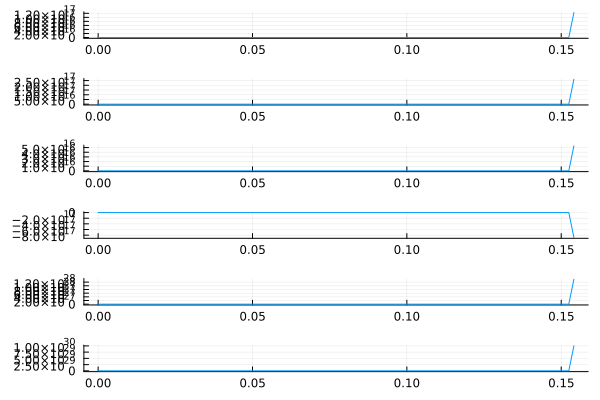

In [27]:
m = Vehicle()
sol = @simulate(m, tspan=[0.0, 100.0], scope=[emfout2, emrout2, stfout2, strout2, sufout1, surout1]);
sol.graph

In [20]:
@model test_block begin
    @blk s1 = RampBlock(slope=5)
    # @blk s2 = RampBlock(slope=1)
    @blk b = Eng_pnt()
    @connect s1 => b.inport[1]
    @connect s1 => b.inport[2]
end

test_block (generic function with 1 method)

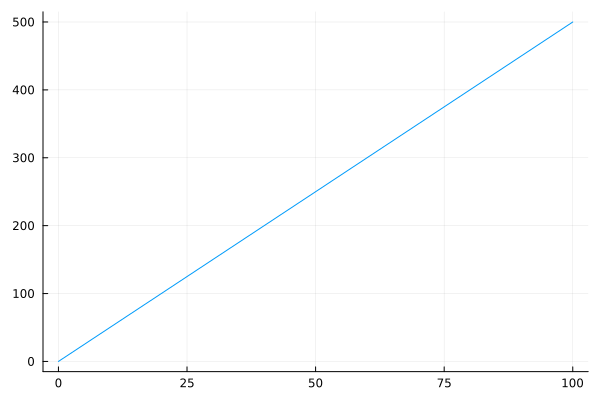

In [21]:
m = test_block()
sol = @simulate(m, tspan=[0.0, 100.0], scope=[s1]);
sol.graph